In [39]:
# Importing Libraries
# General libraries
import os
import numpy as np
import pandas as pd

# Audio processing
import librosa
import librosa.display
import soundfile as sf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import make_scorer, fbeta_score

In [4]:
# Defining dataset paths
base_path = r"C:\Users\mohit\OneDrive\Desktop\EmotionClassifier\data"
speech_path = os.path.join(base_path, "Audio_Speech_Actors_01-24")
song_path = os.path.join(base_path, "Audio_Song_Actors_01-24")

In [5]:
def get_emotion_label(filename):
    parts = filename.split('-')
    emotion_map = {
        '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
        '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
    }
    return emotion_map.get(parts[2], 'unknown')

In [6]:
def extract_features(file_path):
    y, sr = librosa.load(file_path) 
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=y).T, axis=0)
    return np.hstack((mfcc, chroma, zcr, centroid, rmse))

In [7]:
def process_audio_folder(folder_path):
    features = []
    total = 0
    success = 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".wav"):
                total += 1
                path = os.path.join(root, file)
                try:
                    label = get_emotion_label(file)
                    data = extract_features(path)
                    features.append(np.append(data, label))
                    success += 1
                except Exception as e:
                    print(f"[ERROR] {file}: {e}")

    print(f"Processed: {success}/{total} files successfully")

    columns = [f'mfcc_{i}' for i in range(40)] + \
              [f'chroma_{i}' for i in range(12)] + \
              ['zcr', 'centroid', 'rmse', 'label']
    return pd.DataFrame(features, columns=columns)

In [8]:
speech_df = process_audio_folder(speech_path)
song_df = process_audio_folder(song_path)

df = pd.concat([speech_df, song_df], ignore_index=True)
print("Final DataFrame shape:", df.shape)

df.to_csv("features.csv", index=False)

C:\Users\mohit\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Processed: 1440/1440 files successfully
Processed: 1012/1012 files successfully
Final DataFrame shape: (2452, 56)


In [9]:
df=pd.read_csv('features.csv')

In [10]:
df.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,zcr,centroid,rmse,label
0,-697.792603,54.890041,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,-10.977551,-2.848711,...,0.587065,0.638355,0.642918,0.606422,0.610109,0.604039,0.372712,3470.937689,0.002256,neutral
1,-692.855774,55.363899,-1.548319,16.038305,8.818810,-0.146586,-1.373392,-5.293180,-11.623183,-1.348284,...,0.495245,0.546914,0.582028,0.630377,0.628025,0.621930,0.380551,3264.835350,0.002419,neutral
2,-691.587891,58.024662,0.159465,13.624650,5.374112,1.162336,-2.083359,-5.382586,-10.332824,-3.662080,...,0.521380,0.579957,0.639437,0.640014,0.563522,0.563512,0.399123,3233.896123,0.002809,neutral
3,-685.105469,55.879421,2.783262,13.252023,6.989668,2.981274,-1.586029,-6.961661,-10.348489,-3.270768,...,0.536037,0.587688,0.609804,0.558780,0.566496,0.591473,0.396930,3114.655307,0.002617,neutral
4,-727.104370,62.355034,3.121181,15.064671,8.132434,1.927084,-3.274656,-3.761792,-9.750299,-4.853837,...,0.501246,0.553442,0.574716,0.617555,0.653002,0.550760,0.356985,3226.498012,0.001653,calm


In [11]:
df.shape

(2452, 56)

# DATA CHECK AND EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mfcc_0     2452 non-null   float64
 1   mfcc_1     2452 non-null   float64
 2   mfcc_2     2452 non-null   float64
 3   mfcc_3     2452 non-null   float64
 4   mfcc_4     2452 non-null   float64
 5   mfcc_5     2452 non-null   float64
 6   mfcc_6     2452 non-null   float64
 7   mfcc_7     2452 non-null   float64
 8   mfcc_8     2452 non-null   float64
 9   mfcc_9     2452 non-null   float64
 10  mfcc_10    2452 non-null   float64
 11  mfcc_11    2452 non-null   float64
 12  mfcc_12    2452 non-null   float64
 13  mfcc_13    2452 non-null   float64
 14  mfcc_14    2452 non-null   float64
 15  mfcc_15    2452 non-null   float64
 16  mfcc_16    2452 non-null   float64
 17  mfcc_17    2452 non-null   float64
 18  mfcc_18    2452 non-null   float64
 19  mfcc_19    2452 non-null   float64
 20  mfcc_20 

In [13]:
df.isnull().sum() # no missing values

mfcc_0       0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
mfcc_5       0
mfcc_6       0
mfcc_7       0
mfcc_8       0
mfcc_9       0
mfcc_10      0
mfcc_11      0
mfcc_12      0
mfcc_13      0
mfcc_14      0
mfcc_15      0
mfcc_16      0
mfcc_17      0
mfcc_18      0
mfcc_19      0
mfcc_20      0
mfcc_21      0
mfcc_22      0
mfcc_23      0
mfcc_24      0
mfcc_25      0
mfcc_26      0
mfcc_27      0
mfcc_28      0
mfcc_29      0
mfcc_30      0
mfcc_31      0
mfcc_32      0
mfcc_33      0
mfcc_34      0
mfcc_35      0
mfcc_36      0
mfcc_37      0
mfcc_38      0
mfcc_39      0
chroma_0     0
chroma_1     0
chroma_2     0
chroma_3     0
chroma_4     0
chroma_5     0
chroma_6     0
chroma_7     0
chroma_8     0
chroma_9     0
chroma_10    0
chroma_11    0
zcr          0
centroid     0
rmse         0
label        0
dtype: int64

In [14]:
print("Duplicates:", df.duplicated().sum()) # 1 duplicate

Duplicates: 1


In [15]:
df=df.drop_duplicates() # dropping duplicates

In [16]:
print("Duplicates:", df.duplicated().sum()) # no duplicates

Duplicates: 0


In [17]:
# labelling classes
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

In [18]:
print(le.classes_)

['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [19]:
df.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,zcr,centroid,rmse,label,label_encoded
0,-697.792603,54.890041,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,-10.977551,-2.848711,...,0.638355,0.642918,0.606422,0.610109,0.604039,0.372712,3470.937689,0.002256,neutral,5
1,-692.855774,55.363899,-1.548319,16.038305,8.818810,-0.146586,-1.373392,-5.293180,-11.623183,-1.348284,...,0.546914,0.582028,0.630377,0.628025,0.621930,0.380551,3264.835350,0.002419,neutral,5
2,-691.587891,58.024662,0.159465,13.624650,5.374112,1.162336,-2.083359,-5.382586,-10.332824,-3.662080,...,0.579957,0.639437,0.640014,0.563522,0.563512,0.399123,3233.896123,0.002809,neutral,5
3,-685.105469,55.879421,2.783262,13.252023,6.989668,2.981274,-1.586029,-6.961661,-10.348489,-3.270768,...,0.587688,0.609804,0.558780,0.566496,0.591473,0.396930,3114.655307,0.002617,neutral,5
4,-727.104370,62.355034,3.121181,15.064671,8.132434,1.927084,-3.274656,-3.761792,-9.750299,-4.853837,...,0.553442,0.574716,0.617555,0.653002,0.550760,0.356985,3226.498012,0.001653,calm,1


In [20]:
myset=set(df["label_encoded"])
myset

{0, 1, 2, 3, 4, 5, 6, 7}

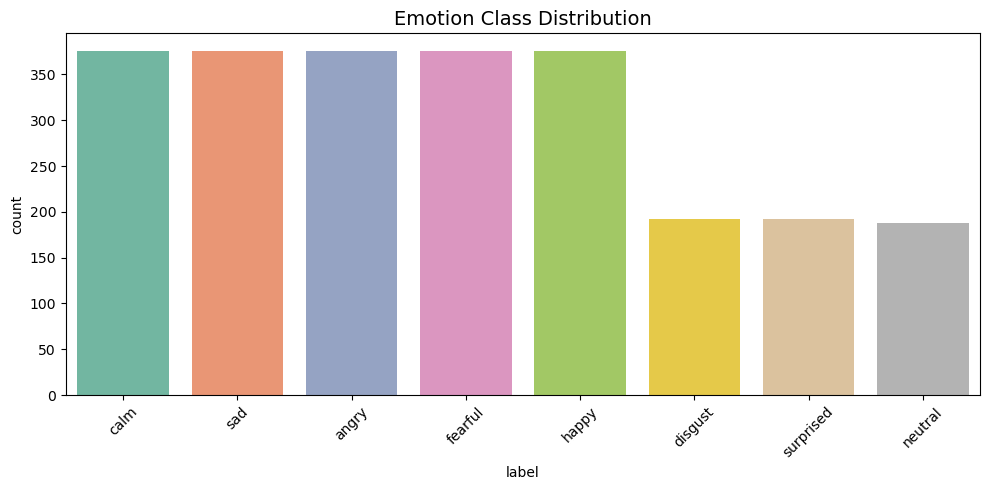

label
calm         376
sad          376
angry        376
fearful      376
happy        375
disgust      192
surprised    192
neutral      188
Name: count, dtype: int64

In [21]:
# Emotion class dustribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="label", order=df['label'].value_counts().index, palette="Set2")
plt.title("Emotion Class Distribution", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['label'].value_counts()

## OBSERVATION

1.The dataset contains all 8 emotion classes with varying frequency.

2.Calm, sad, angry, fearful, and happy are the most frequent, each ~370 samples.

3.Disgust, surprised, and neutral have fewer than 220 samples — highlighting class imbalance.




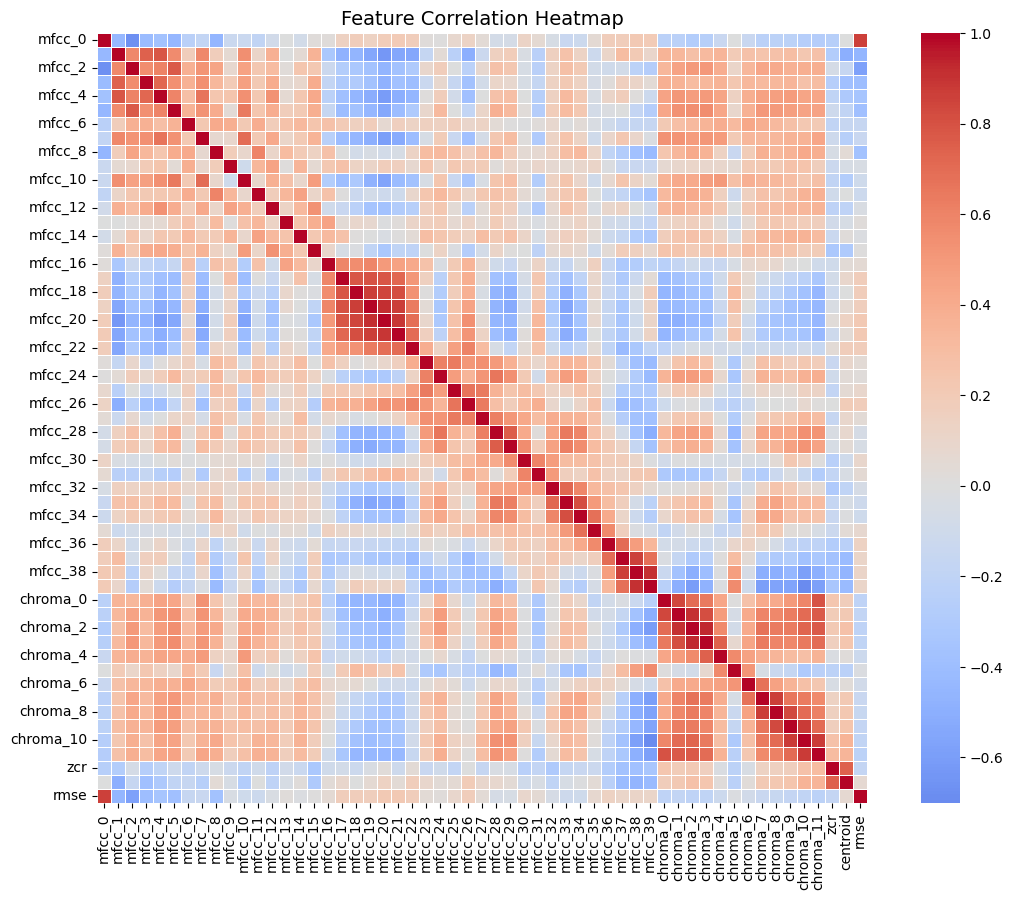

In [22]:
# correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.drop(["label", "label_encoded"], axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

## OBSERVATION

1.MFCC features show strong positive correlation with adjacent MFCCs (e.g., mfcc_0 to mfcc_10).

2.Chroma features are moderately correlated among themselves but weakly correlated with MFCCs.

3.RMSE, spectral centroid, and zero-crossing rate are largely independent, adding unique value.



C:\Users\mohit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


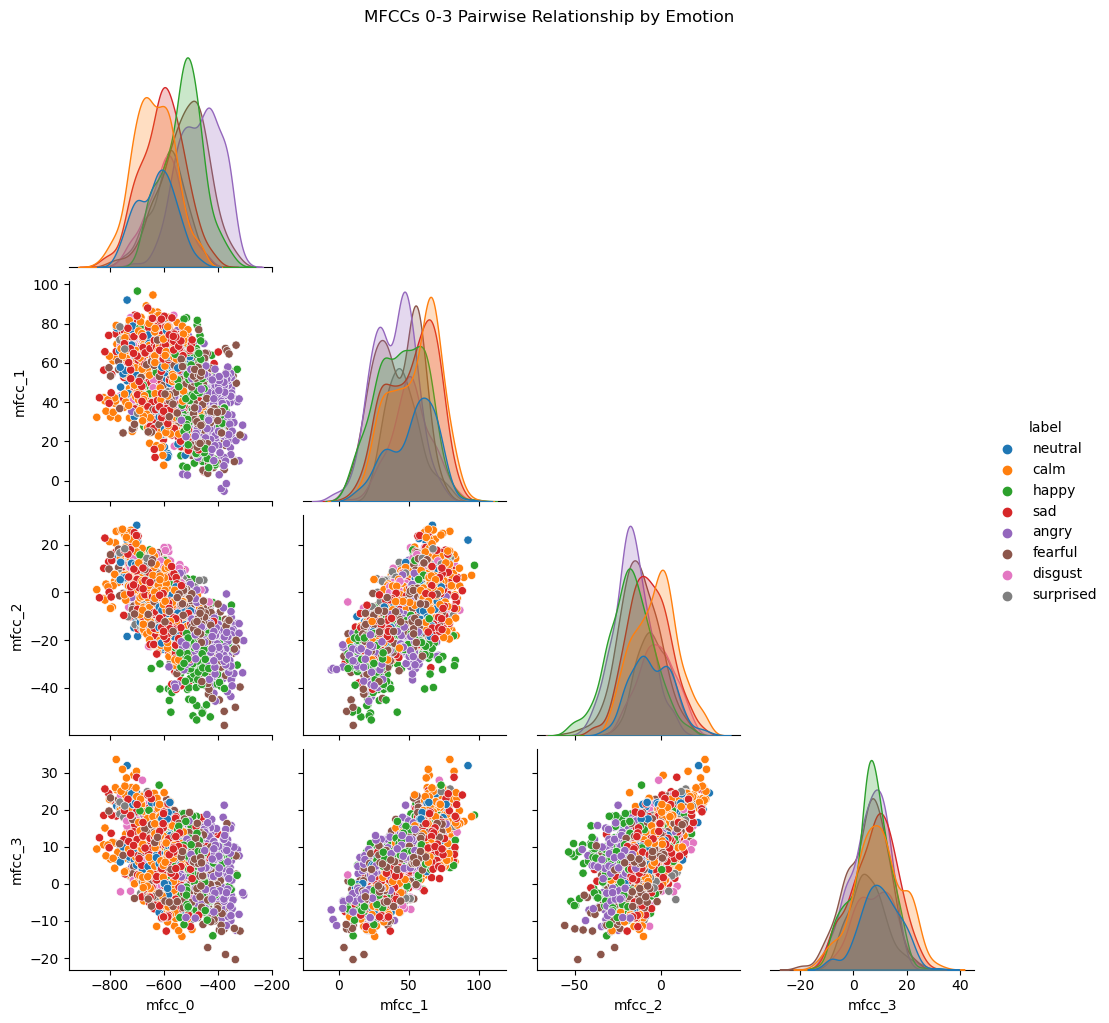

In [23]:
# pairplot
sns.pairplot(df[[f'mfcc_{i}' for i in range(4)] + ['label']], hue='label', corner=True, palette="tab10")
plt.suptitle("MFCCs 0-3 Pairwise Relationship by Emotion", y=1.02)
plt.show()

## OBSERVATION

1.Distinct clusters are seen for angry, happy, and sad in MFCC space.

2.Significant overlap exists among neutral and calm, showing why they are harder to classify.

3.Some features (like MFCC_2 vs MFCC_0) show stronger separation than others.

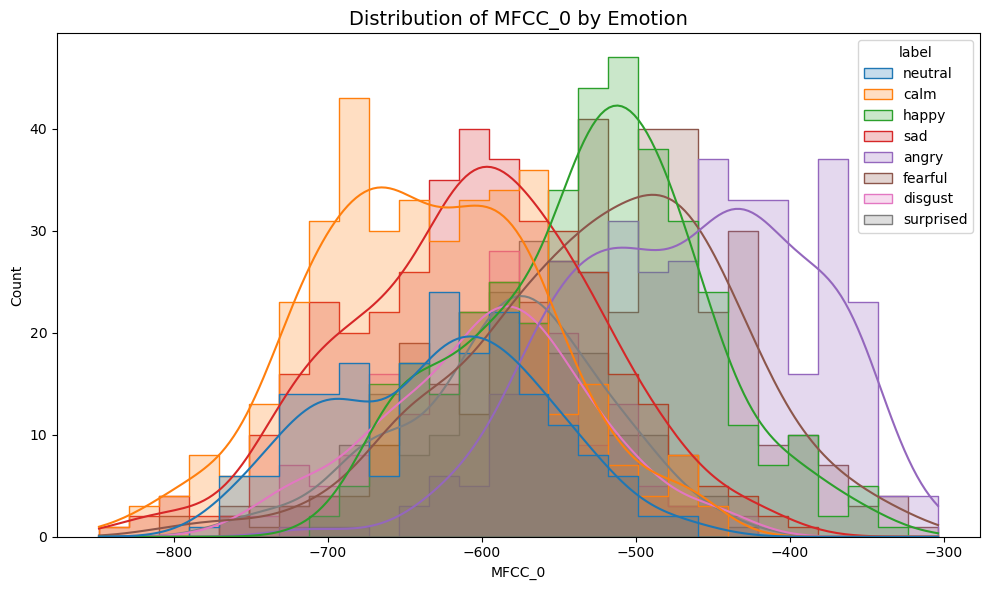

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mfcc_0', hue='label', kde=True, palette='tab10', element='step')
plt.title("Distribution of MFCC_0 by Emotion", fontsize=14)
plt.xlabel("MFCC_0")
plt.tight_layout()
plt.show()

## OBSERVATION

1.MFCC_0 is broadly distributed and captures meaningful variation between emotions.

2.Happy and angry show peaks in higher MFCC_0 ranges, while calm and neutral peak lower.

3.Distribution shapes suggest that MFCC_0 is skewed and class-dependent.



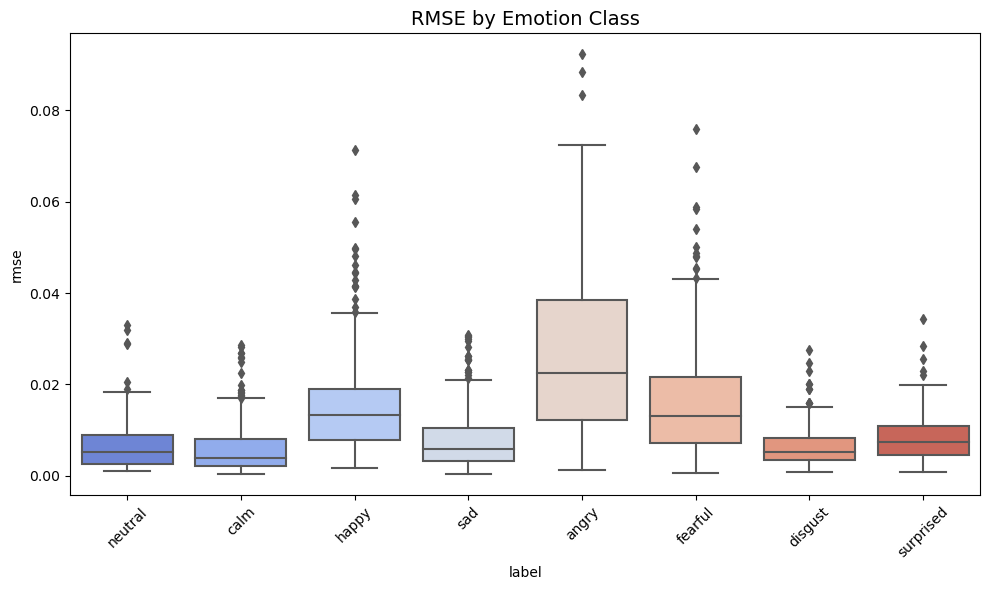

In [25]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='rmse', palette='coolwarm')
plt.title("RMSE by Emotion Class", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## OBSERVATION

1.Angry has the highest median RMSE, followed by fearful — indicating more vocal intensity.

2.Neutral, calm, and sad have tightly packed, low-energy RMSE distributions.

3.Wide range of outliers in angry and fearful suggest emotional intensity variability.

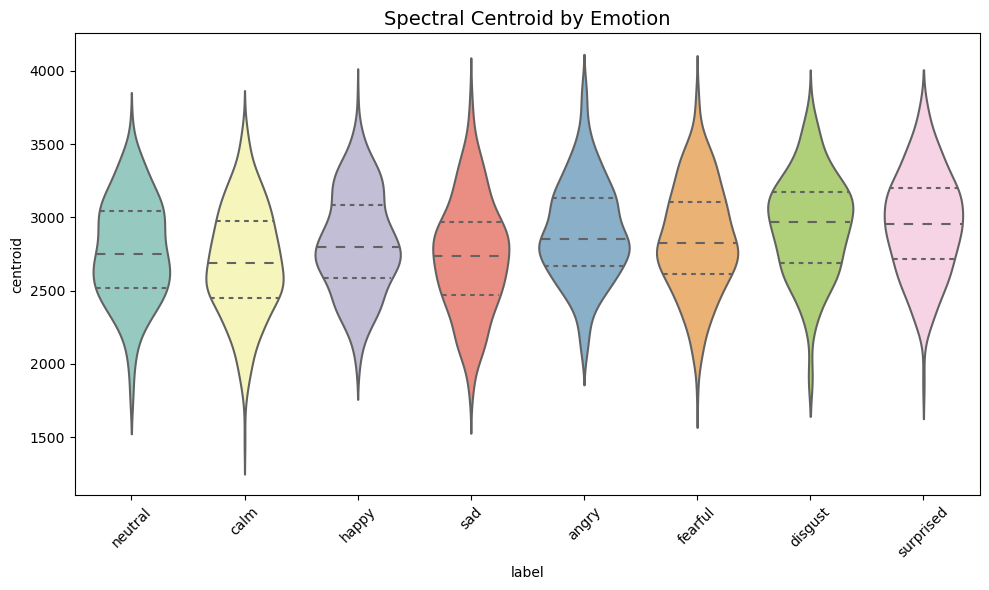

In [26]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='centroid', palette='Set3', inner="quartile")
plt.title("Spectral Centroid by Emotion", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## OBSERVATION

1.Angry and surprised emotions have higher spectral centroids, indicating brighter (sharper) sounds.

2.Calm and sad have lower centroids, pointing to duller and smoother tonal qualities.

3.The spread within each emotion shows varying vocal brightness even within the same emotion.



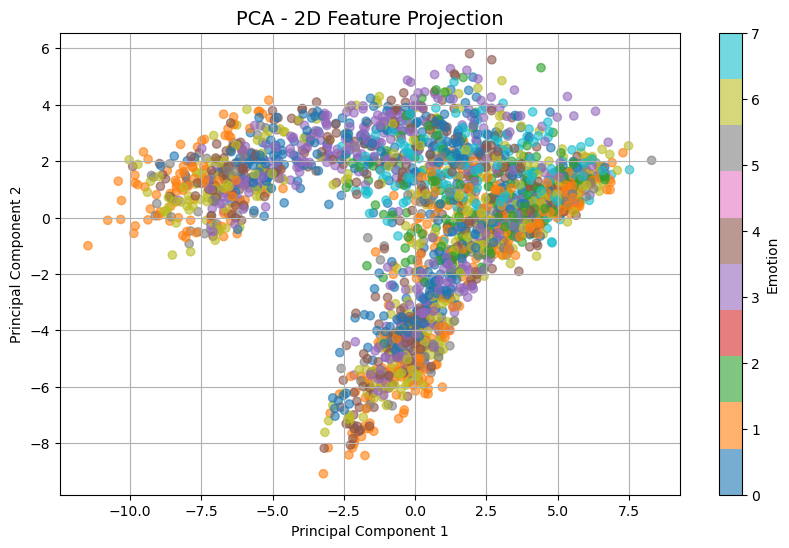

In [27]:
# PCA-2d visualisation
from sklearn.decomposition import PCA

X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.6)
plt.title("PCA - 2D Feature Projection", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, ticks=range((df['label'].nunique())), label='Emotion')
plt.grid(True)
plt.show()

## OBSERVATION

1.PCA reveals partial clustering of emotions — useful for understanding separability in feature space.

2.Some overlap exists between calm, neutral, and sad, suggesting complexity in classification.

3.Variance along PC1 and PC2 still captures key information, justifying the dimensionality reduction.



# MODEL IMPLEMENTATION AND TRAINING

In [28]:
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# Train-test split (80/20)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## SMOTE (For Class Imbalance)

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_bal))

Before SMOTE: [301 301 153 301 300 150 301 153]
After SMOTE : [301 301 301 301 301 301 301 301]


In [30]:
from sklearn.metrics import fbeta_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
    plt.figure(figsize=(8,6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print(f"Overall F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Overall F2 Score: {fbeta_score(y_true, y_pred, beta=2, average='weighted'):.4f}")


## Random Forest


Evaluation for Random Forest

Classification Report:
              precision    recall  f1-score   support

       angry       0.90      0.75      0.82        75
        calm       0.77      0.87      0.82        75
     disgust       0.34      0.62      0.44        39
     fearful       0.69      0.63      0.66        75
       happy       0.92      0.65      0.77        75
     neutral       0.71      0.76      0.73        38
         sad       0.72      0.56      0.63        75
   surprised       0.47      0.67      0.55        39

    accuracy                           0.69       491
   macro avg       0.69      0.69      0.68       491
weighted avg       0.73      0.69      0.70       491



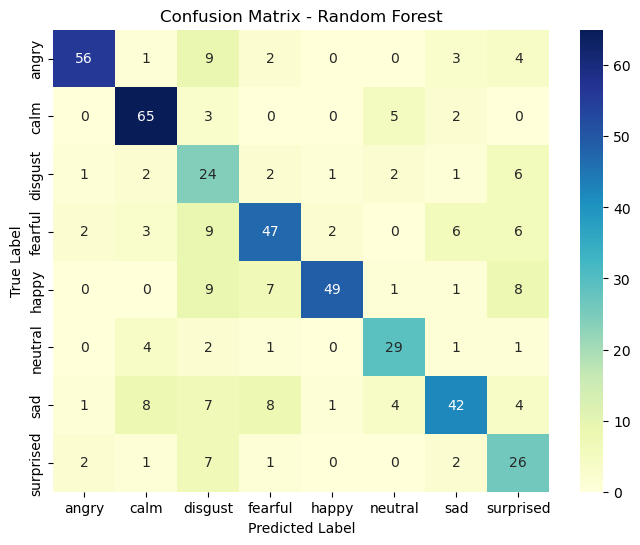

Overall Accuracy: 68.84%
Overall F1 Score: 0.6993
Overall F2 Score: 0.6898


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_bal, y_train_bal)
rf_pred = rf_model.predict(X_val)

evaluate_model(y_val, rf_pred, "Random Forest")


## XG Boost

C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:29:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluation for XGBoost

Classification Report:
              precision    recall  f1-score   support

       angry       0.86      0.81      0.84        75
        calm       0.84      0.77      0.81        75
     disgust       0.44      0.62      0.52        39
     fearful       0.74      0.68      0.71        75
       happy       0.86      0.73      0.79        75
     neutral       0.64      0.79      0.71        38
         sad       0.69      0.67      0.68        75
   surprised       0.62      0.72      0.67        39

    accuracy                           0.73       491
   macro avg       0.71      0.72      0.71       491
weighted avg       0.74      0.73      0.73       491



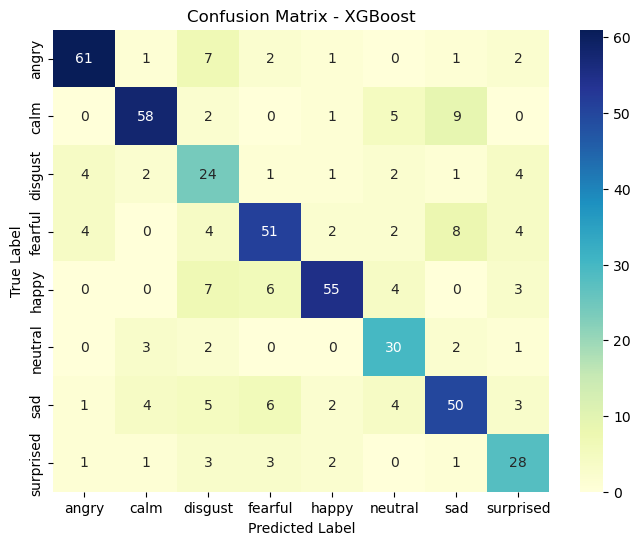

Overall Accuracy: 72.71%
Overall F1 Score: 0.7323
Overall F2 Score: 0.7283


In [32]:
# XG Boost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.07,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_bal, y_train_bal)
xgb_pred = xgb_model.predict(X_val)

evaluate_model(y_val, xgb_pred, "XGBoost")

## Light GBM


Evaluation for LightGBM

Classification Report:
              precision    recall  f1-score   support

       angry       0.86      0.83      0.84        75
        calm       0.81      0.83      0.82        75
     disgust       0.53      0.67      0.59        39
     fearful       0.74      0.68      0.71        75
       happy       0.90      0.73      0.81        75
     neutral       0.69      0.82      0.75        38
         sad       0.69      0.69      0.69        75
   surprised       0.63      0.69      0.66        39

    accuracy                           0.75       491
   macro avg       0.73      0.74      0.73       491
weighted avg       0.76      0.75      0.75       491



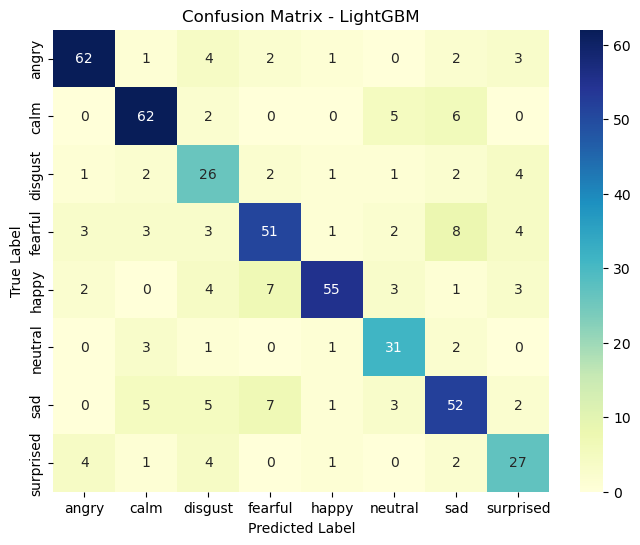

Overall Accuracy: 74.54%
Overall F1 Score: 0.7482
Overall F2 Score: 0.7459


In [33]:
# Light GBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=12,
    num_leaves=64,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train_bal, y_train_bal)
lgb_pred = lgb_model.predict(X_val)

evaluate_model(y_val, lgb_pred, "LightGBM")

# Hyperparameter Tunning

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best RF Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': False}

Evaluation for Random Forest (Tuned)

Classification Report:
              precision    recall  f1-score   support

       angry       0.88      0.75      0.81        75
        calm       0.77      0.85      0.81        75
     disgust       0.39      0.67      0.50        39
     fearful       0.75      0.68      0.71        75
       happy       0.93      0.72      0.81        75
     neutral       0.73      0.71      0.72        38
         sad       0.72      0.64      0.68        75
   surprised       0.56      0.69      0.62        39

    accuracy                           0.72       491
   macro avg       0.72      0.71      0.71       491
weighted avg       0.75      0.72      0.73       491



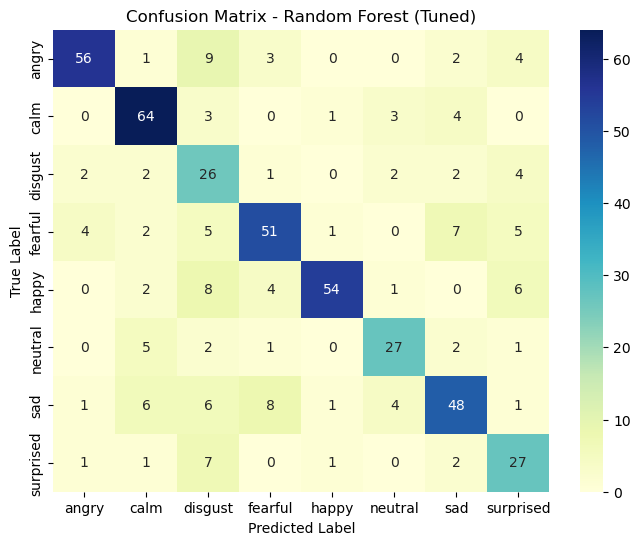

Overall Accuracy: 71.89%
Overall F1 Score: 0.7274
Overall F2 Score: 0.7204


In [43]:
#random forest tuned
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
f2_scorer = make_scorer(fbeta_score, beta=2, average='weighted')
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_params,
    n_iter=50,
    scoring=f2_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train_bal, y_train_bal)
print("Best RF Params:", rf_search.best_params_)

rf_best = rf_search.best_estimator_
rf_pred = rf_best.predict(X_val)

evaluate_model(y_val, rf_pred, "Random Forest (Tuned)")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:43:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}

Evaluation for XGBoost (Tuned)

Classification Report:
              precision    recall  f1-score   support

       angry       0.89      0.87      0.88        75
        calm       0.82      0.77      0.79        75
     disgust       0.51      0.62      0.56        39
     fearful       0.71      0.72      0.72        75
       happy       0.89      0.72      0.79        75
     neutral       0.67      0.79      0.72        38
         sad       0.71      0.65      0.68        75
   surprised       0.59      0.74      0.66        39

    accuracy                           0.74       491
   macro avg       0.72      0.74      0.73       491
weighted avg       0.75      0.74      0.74       491



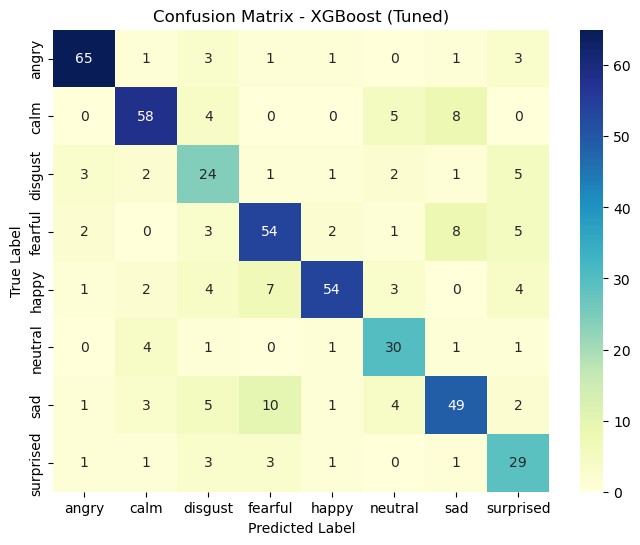

Overall Accuracy: 73.93%
Overall F1 Score: 0.7427
Overall F2 Score: 0.7399


In [44]:
# XG boost tuned
xgb_params = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42),
    param_distributions=xgb_params,
    n_iter=50,
    scoring=f2_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train_bal, y_train_bal)
print("Best XGB Params:", xgb_search.best_params_)

xgb_best = xgb_search.best_estimator_
xgb_pred = xgb_best.predict(X_val)

evaluate_model(y_val, xgb_pred, "XGBoost (Tuned)")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best LGBM Params: {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8, 'class_weight': 'balanced'}

Evaluation for LightGBM (Tuned)

Classification Report:
              precision    recall  f1-score   support

       angry       0.87      0.83      0.85        75
        calm       0.81      0.80      0.81        75
     disgust       0.53      0.67      0.59        39
     fearful       0.75      0.68      0.71        75
       happy       0.87      0.80      0.83        75
     neutral       0.71      0.76      0.73        38
         sad       0.65      0.68      0.67        75
   surprised       0.63      0.67      0.65        39

    accuracy                           0.74       491
   macro avg       0.73      0.74      0.73       491
weighted avg       0.75      0.74      0.75       491



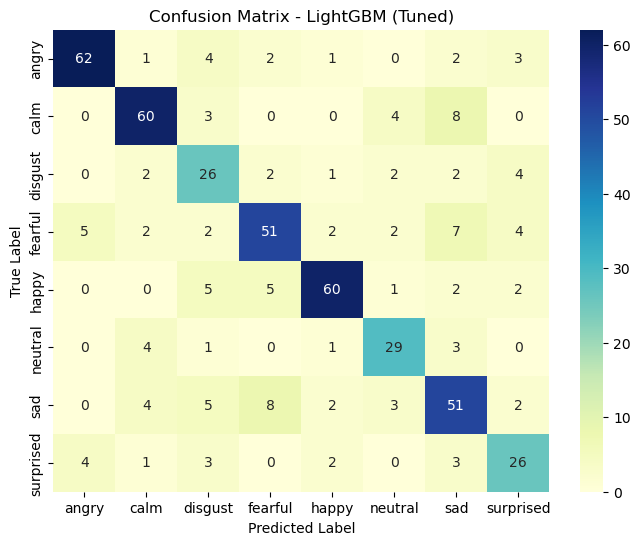

Overall Accuracy: 74.34%
Overall F1 Score: 0.7462
Overall F2 Score: 0.7442


In [45]:
# light gbm tuned
lgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15, -1],
    'num_leaves': [31, 64, 128],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'class_weight': ['balanced']
}

lgb_search = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    param_distributions=lgb_params,
    n_iter=50,
    scoring=f2_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

lgb_search.fit(X_train_bal, y_train_bal)
print("Best LGBM Params:", lgb_search.best_params_)

lgb_best = lgb_search.best_estimator_
lgb_pred = lgb_best.predict(X_val)

evaluate_model(y_val, lgb_pred, "LightGBM (Tuned)")

# Ensemble Learning (Model Stacking)

In [46]:
# ensemble learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
# Base learners:tuned models
base_learners = [
    ('rf', rf_best),
    ('xgb', xgb_best),
    ('lgb', lgb_best)
]

# Meta-learner
meta_model = LogisticRegression(max_iter=1000, C=0.5,class_weight='balanced', random_state=42)

# Final stacking model
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [48]:
stacked_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       class_weight='balanced',
                                                       max_depth=20,
                                                       n_estimators=500,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorica...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=-1,
                                              num_parallel_tree=None, ...)),
                               ('lgb',
                                LGBMClassifier(class_weight='balanced',
                                               colsample_bytree=0.8,
                                               learning_rate=0.05, max_depth=10,
                                               n_estimators=300,
                                               random_state=42,
                                               subsample=0.8))],
                   final_estimator=LogisticRegression(C=0.5,
                                                      class_weight='balanced',
                                                      max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1, verbose=1)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, fbeta_score

def evaluate_model(y_true, y_pred, model_name, y_train_true=None, y_train_pred=None):
    print(f"\nEvaluation for {model_name}")
    if y_train_true is not None and y_train_pred is not None:
        print("\nTraining Metrics:")
        print(f"Training Accuracy: {accuracy_score(y_train_true, y_train_pred)*100:.2f}%")
        print(f"Training F1 Score: {f1_score(y_train_true, y_train_pred, average='weighted'):.4f}")
        print(f"Training F2 Score: {fbeta_score(y_train_true, y_train_pred, beta=2, average='weighted'):.4f}")

    print("\nValidation Metrics:")
    report = classification_report(y_true, y_pred, target_names=le.classes_, output_dict=True)
    
    print("\nClassification Report (per class):")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_true, y_pred)
    class_accuracies = cm.diagonal() / cm.sum(axis=1)
    
    print("\nPer-Class Accuracy (%):")
    for i, emotion in enumerate(le.classes_):
        print(f"{emotion}: {class_accuracies[i]*100:.2f}%")
    
    # Confusion Matrix
    df_cm = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    # Overall Validation Metrics
    print(f"\nOverall Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print(f"Overall F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Overall F2 Score: {fbeta_score(y_true, y_pred, beta=2, average='weighted'):.4f}")


Evaluation for Stacked Model (Final)

Training Metrics:
Training Accuracy: 100.00%
Training F1 Score: 1.0000
Training F2 Score: 1.0000

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.87      0.83      0.85        75
        calm       0.86      0.80      0.83        75
     disgust       0.49      0.67      0.57        39
     fearful       0.74      0.69      0.72        75
       happy       0.88      0.77      0.82        75
     neutral       0.72      0.82      0.77        38
         sad       0.69      0.72      0.71        75
   surprised       0.68      0.69      0.68        39

    accuracy                           0.75       491
   macro avg       0.74      0.75      0.74       491
weighted avg       0.77      0.75      0.76       491


Per-Class Accuracy (%):
angry: 82.67%
calm: 80.00%
disgust: 66.67%
fearful: 69.33%
happy: 77.33%
neutral: 81.58%
sad: 72.00%
surprised: 69.23%


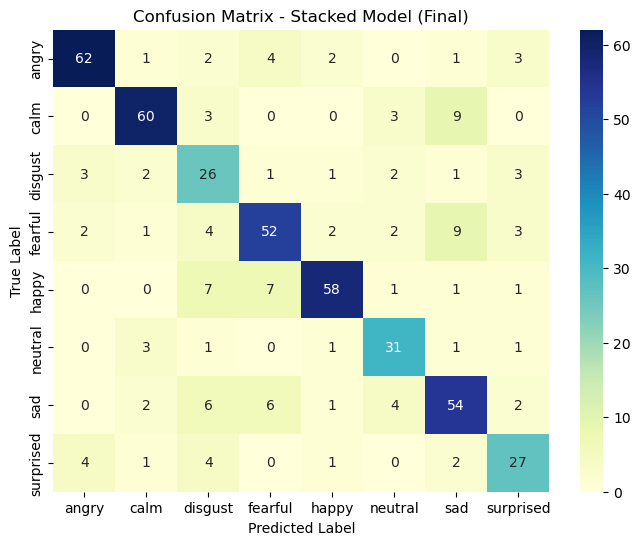


Overall Accuracy: 75.36%
Overall F1 Score: 0.7576
Overall F2 Score: 0.7546


In [50]:
y_val_pred = stacked_model.predict(X_val)
y_train_pred = stacked_model.predict(X_train)
evaluate_model(y_val, y_val_pred, "Stacked Model (Final)", y_train_true=y_train, y_train_pred=y_train_pred)

## Model Stacking Based on Feature Importance

In [51]:
## feature importance
# Getting combined feature importances
features = X_train.columns.tolist()

rf_importance = rf_best.feature_importances_
xgb_importance = xgb_best.feature_importances_
lgb_importance = lgb_best.feature_importances_

importances_df = pd.DataFrame({
    'Feature': features,
    'RF': rf_importance,
    'XGB': xgb_importance,
    'LGB': lgb_importance
})

# Average score
importances_df['Avg'] = (importances_df['RF'] + importances_df['XGB'] + importances_df['LGB']) / 3

# Sort by average importance
importances_df = importances_df.sort_values(by='Avg', ascending=False)

In [52]:
top_n = 40  
top_features = importances_df['Feature'].head(top_n).tolist()

# Filtering training and validation sets
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]


In [53]:
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.5, 
    random_state=42
)

base_learners = [
    ('rf', rf_best),
    ('xgb', xgb_best),
    ('lgb', lgb_best)
]

stacked_model_topN = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)


Evaluation for Stacked Model (Top 40 Features)

Training Metrics:
Training Accuracy: 100.00%
Training F1 Score: 1.0000
Training F2 Score: 1.0000

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.87      0.83      0.85        75
        calm       0.87      0.80      0.83        75
     disgust       0.54      0.72      0.62        39
     fearful       0.77      0.68      0.72        75
       happy       0.86      0.76      0.81        75
     neutral       0.78      0.76      0.77        38
         sad       0.71      0.79      0.75        75
   surprised       0.62      0.74      0.67        39

    accuracy                           0.76       491
   macro avg       0.75      0.76      0.75       491
weighted avg       0.78      0.76      0.77       491


Per-Class Accuracy (%):
angry: 82.67%
calm: 80.00%
disgust: 71.79%
fearful: 68.00%
happy: 76.00%
neutral: 76.32%
sad: 78.67%
surprised: 74.36%


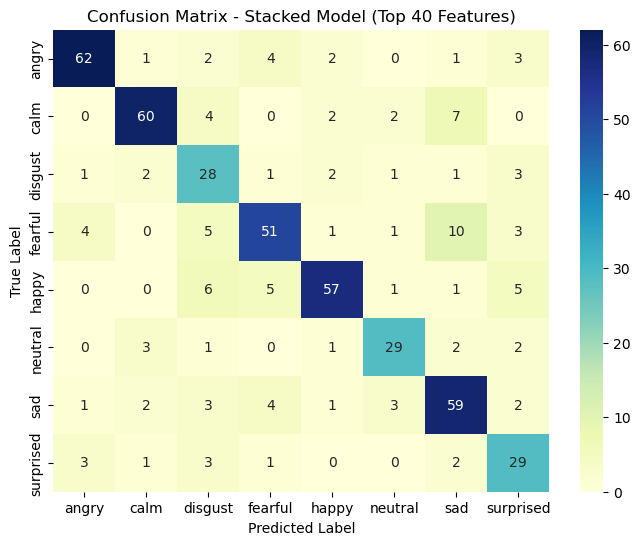


Overall Accuracy: 76.37%
Overall F1 Score: 0.7674
Overall F2 Score: 0.7644


In [54]:
stacked_model_topN.fit(X_train_top, y_train)

y_train_pred = stacked_model_topN.predict(X_train_top)
y_val_pred = stacked_model_topN.predict(X_val_top)

evaluate_model(
    y_true=y_val,
    y_pred=y_val_pred,
    model_name=f"Stacked Model (Top {top_n} Features)",
    y_train_true=y_train,
    y_train_pred=y_train_pred
)

In [55]:
# for top 50 features
top_n = 50  
top_features = importances_df['Feature'].head(top_n).tolist()

# Filter training and validation sets
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]


In [56]:
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.5,  
    random_state=42
)

base_learners = [
    ('rf', rf_best),
    ('xgb', xgb_best),
    ('lgb', lgb_best)
]

stacked_model_topN = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)


Evaluation for Stacked Model (Top 50 Features)

Training Metrics:
Training Accuracy: 100.00%
Training F1 Score: 1.0000
Training F2 Score: 1.0000

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.86      0.83      0.84        75
        calm       0.87      0.79      0.83        75
     disgust       0.52      0.72      0.60        39
     fearful       0.74      0.71      0.72        75
       happy       0.92      0.76      0.83        75
     neutral       0.78      0.82      0.79        38
         sad       0.70      0.75      0.72        75
   surprised       0.67      0.74      0.71        39

    accuracy                           0.76       491
   macro avg       0.76      0.76      0.76       491
weighted avg       0.78      0.76      0.77       491


Per-Class Accuracy (%):
angry: 82.67%
calm: 78.67%
disgust: 71.79%
fearful: 70.67%
happy: 76.00%
neutral: 81.58%
sad: 74.67%
surprised: 74.36%


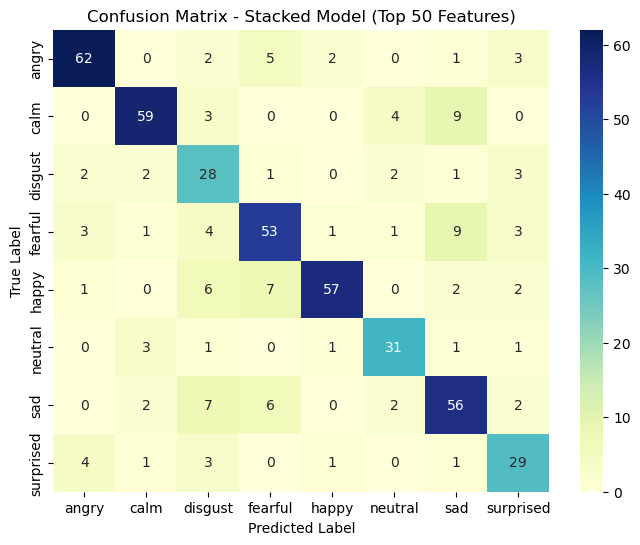


Overall Accuracy: 76.37%
Overall F1 Score: 0.7680
Overall F2 Score: 0.7647


In [57]:
stacked_model_topN.fit(X_train_top, y_train)

y_train_pred = stacked_model_topN.predict(X_train_top)
y_val_pred = stacked_model_topN.predict(X_val_top)

evaluate_model(
    y_true=y_val,
    y_pred=y_val_pred,
    model_name=f"Stacked Model (Top {top_n} Features)",
    y_train_true=y_train,
    y_train_pred=y_train_pred
)

## Model Stacking (Top Features-Light GBM)

In [58]:
# feature importance light gbm

features = X_train.columns.tolist()

# Get feature importance by 'gain'
lgb_importance = lgb_best.booster_.feature_importance(importance_type='gain')

lgb_fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': lgb_importance
}).sort_values(by='Importance', ascending=False)

lgb_fi_df.head(15)

,Feature,Importance
0,mfcc_0,8706.199869
54,rmse,6569.488762
39,mfcc_39,5819.183870
30,mfcc_30,3210.062363
47,chroma_7,2878.898660
18,mfcc_18,2453.361083
6,mfcc_6,2405.947636
31,mfcc_31,2322.642872
2,mfcc_2,2275.250142
45,chroma_5,2252.835191


In [59]:
top_n = 40  
top_features = lgb_fi_df['Feature'].head(top_n).tolist()

X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

In [60]:
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.5,
    random_state=42
)

base_learners = [
    ('rf', rf_best),
    ('xgb', xgb_best),
    ('lgb', lgb_best)
]

stacked_lgbfi = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)



Evaluation for Stacked Model (Top 40 LightGBM Features)

Training Metrics:
Training Accuracy: 100.00%
Training F1 Score: 1.0000
Training F2 Score: 1.0000

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.87      0.81      0.84        75
        calm       0.87      0.81      0.84        75
     disgust       0.58      0.77      0.66        39
     fearful       0.77      0.71      0.74        75
       happy       0.88      0.77      0.82        75
     neutral       0.71      0.79      0.75        38
         sad       0.73      0.76      0.75        75
   surprised       0.64      0.72      0.67        39

    accuracy                           0.77       491
   macro avg       0.76      0.77      0.76       491
weighted avg       0.78      0.77      0.77       491


Per-Class Accuracy (%):
angry: 81.33%
calm: 81.33%
disgust: 76.92%
fearful: 70.67%
happy: 77.33%
neutral: 78.95%
sad: 76.00%
surprised: 

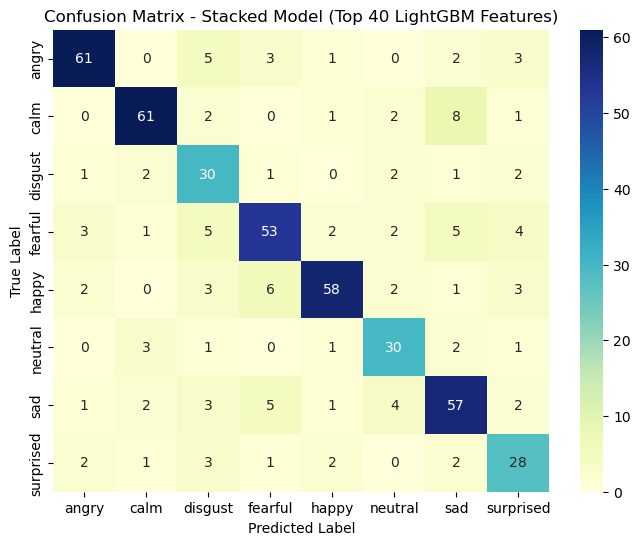


Overall Accuracy: 76.99%
Overall F1 Score: 0.7730
Overall F2 Score: 0.7704


In [61]:
stacked_lgbfi.fit(X_train_top, y_train)

y_train_pred = stacked_lgbfi.predict(X_train_top)
y_val_pred = stacked_lgbfi.predict(X_val_top)

evaluate_model(
    y_true=y_val,
    y_pred=y_val_pred,
    model_name=f"Stacked Model (Top {top_n} LightGBM Features)",
    y_train_true=y_train,
    y_train_pred=y_train_pred
)

In [62]:
# for top 40 featurees
top_n = 40  
top_features = lgb_fi_df['Feature'].head(top_n).tolist()

X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

In [63]:
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.05,
    random_state=42
)

base_learners = [
    ('xgb', xgb_best),
    ('lgb', lgb_best)
]

stacked_lgbfi = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)


Evaluation for Stacked Model (Top 40 LightGBM Features)

Training Metrics:
Training Accuracy: 100.00%
Training F1 Score: 1.0000
Training F2 Score: 1.0000

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.86      0.83      0.84        75
        calm       0.86      0.80      0.83        75
     disgust       0.68      0.77      0.72        39
     fearful       0.73      0.69      0.71        75
       happy       0.83      0.79      0.81        75
     neutral       0.73      0.79      0.76        38
         sad       0.70      0.76      0.73        75
   surprised       0.68      0.72      0.70        39

    accuracy                           0.77       491
   macro avg       0.76      0.77      0.76       491
weighted avg       0.77      0.77      0.77       491


Per-Class Accuracy (%):
angry: 82.67%
calm: 80.00%
disgust: 76.92%
fearful: 69.33%
happy: 78.67%
neutral: 78.95%
sad: 76.00%
surprised: 

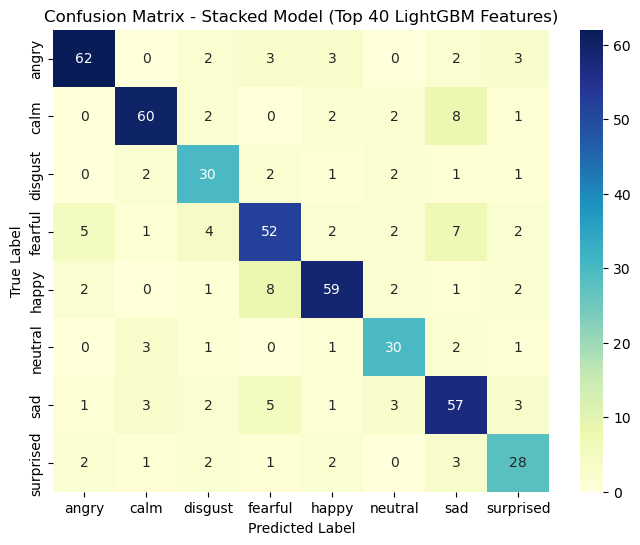


Overall Accuracy: 76.99%
Overall F1 Score: 0.7710
Overall F2 Score: 0.7701


In [64]:
stacked_lgbfi.fit(X_train_top, y_train)

y_train_pred = stacked_lgbfi.predict(X_train_top)
y_val_pred = stacked_lgbfi.predict(X_val_top)

evaluate_model(
    y_true=y_val,
    y_pred=y_val_pred,
    model_name=f"Stacked Model (Top {top_n} LightGBM Features)",
    y_train_true=y_train,
    y_train_pred=y_train_pred
)

# OOF (Out Of Fold) Model Stacking

1.It Refers to predictions made on validation folds during cross-validation. These are "unseen" predictions for each data point, not influenced by the model trained on that fold.

2.Using OOF predictions prevents data leakage when training the meta-model.

3.As we seen in above models there is overfitting on the test data so we sre doing this to prevent overfitting on the test data

In [65]:
from sklearn.model_selection import StratifiedKFold


n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
n_classes = len(le.classes_)

# OOF placeholders (shape: [n_samples, n_classes])
oof_rf = np.zeros((X_train.shape[0], n_classes))
oof_xgb = np.zeros((X_train.shape[0], n_classes))
oof_lgb = np.zeros((X_train.shape[0], n_classes))

# OOF generation
for train_idx, valid_idx in skf.split(X_train, y_train):
    X_tr, X_val_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_tr, y_val_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    rf_best.fit(X_tr, y_tr)
    xgb_best.fit(X_tr, y_tr)
    lgb_best.fit(X_tr, y_tr)

    oof_rf[valid_idx] = rf_best.predict_proba(X_val_fold)
    oof_xgb[valid_idx] = xgb_best.predict_proba(X_val_fold)
    oof_lgb[valid_idx] = lgb_best.predict_proba(X_val_fold)


C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:51:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:51:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:51:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:51:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

In [66]:
# Combining OOF predictions into a single training matrix
X_meta_train = np.hstack([oof_rf, oof_xgb, oof_lgb])

In [67]:
# Predict on validation set using base models
rf_val_pred = rf_best.predict_proba(X_val)
xgb_val_pred = xgb_best.predict_proba(X_val)
lgb_val_pred = lgb_best.predict_proba(X_val)

# Combine validation meta-features
X_meta_val = np.hstack([rf_val_pred, xgb_val_pred, lgb_val_pred])

In [68]:
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.1,
    random_state=42
)

meta_model.fit(X_meta_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)


Evaluation for OOF Stacked Model (LogReg)

Training Metrics:
Training Accuracy: 72.65%
Training F1 Score: 0.7273
Training F2 Score: 0.7267

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.82      0.88      0.85        75
        calm       0.85      0.81      0.83        75
     disgust       0.49      0.59      0.53        39
     fearful       0.79      0.65      0.72        75
       happy       0.82      0.77      0.79        75
     neutral       0.76      0.76      0.76        38
         sad       0.68      0.73      0.71        75
   surprised       0.62      0.64      0.63        39

    accuracy                           0.75       491
   macro avg       0.73      0.73      0.73       491
weighted avg       0.75      0.75      0.75       491


Per-Class Accuracy (%):
angry: 88.00%
calm: 81.33%
disgust: 58.97%
fearful: 65.33%
happy: 77.33%
neutral: 76.32%
sad: 73.33%
surprised: 64.10%


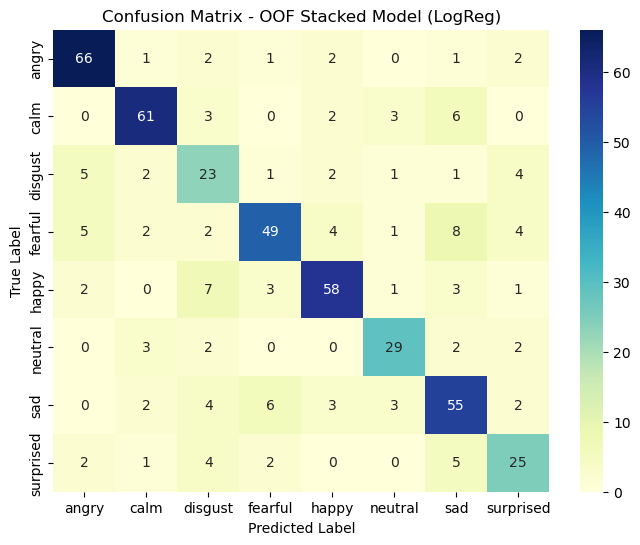


Overall Accuracy: 74.54%
Overall F1 Score: 0.7470
Overall F2 Score: 0.7456


In [69]:
y_train_pred = meta_model.predict(X_meta_train)
y_val_pred = meta_model.predict(X_meta_val)

evaluate_model(
    y_val, y_val_pred,
    model_name="OOF Stacked Model (LogReg)",
    y_train_true=y_train,
    y_train_pred=y_train_pred
)

In [70]:
print("Original y_train class counts:")
print(y_train.value_counts())
print("\nOriginal y_val class counts:")
print(y_val.value_counts())

Original y_train class counts:
label_encoded
3    301
0    301
1    301
6    301
4    300
2    153
7    153
5    150
Name: count, dtype: int64

Original y_val class counts:
label_encoded
3    75
0    75
4    75
1    75
6    75
7    39
2    39
5    38
Name: count, dtype: int64


## Dropping Minority Classes

In [71]:
y_train_labels = le.inverse_transform(y_train)
y_val_labels = le.inverse_transform(y_val)

In [73]:
# Classes to keep
classes_to_keep = ['angry', 'calm', 'fearful', 'happy', 'neutral', 'sad']

# Decode original labels
y_train_labels = le.inverse_transform(y_train)
y_val_labels = le.inverse_transform(y_val)

# Create boolean masks aligned with original indices
train_mask = pd.Series(y_train_labels, index=X_train.index).isin(classes_to_keep)
val_mask = pd.Series(y_val_labels, index=X_val.index).isin(classes_to_keep)

# Apply masks to filter features and labels
X_train_filtered = X_train[train_mask].reset_index(drop=True)
y_train_filtered = pd.Series(y_train_labels, index=X_train.index)[train_mask].reset_index(drop=True)

X_val_filtered = X_val[val_mask].reset_index(drop=True)
y_val_filtered = pd.Series(y_val_labels, index=X_val.index)[val_mask].reset_index(drop=True)


In [74]:
from sklearn.preprocessing import LabelEncoder

le_new = LabelEncoder()
y_train_enc = le_new.fit_transform(y_train_filtered)
y_val_enc = le_new.transform(y_val_filtered)

In [75]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
n_classes = len(le_new.classes_)

# Initialize OOF prediction matrices
oof_rf = np.zeros((X_train_filtered.shape[0], n_classes))
oof_xgb = np.zeros((X_train_filtered.shape[0], n_classes))
oof_lgb = np.zeros((X_train_filtered.shape[0], n_classes))

for train_idx, valid_idx in skf.split(X_train_filtered, y_train_enc):
    X_tr, X_val_fold = X_train_filtered.iloc[train_idx], X_train_filtered.iloc[valid_idx]
    y_tr, y_val_fold = y_train_enc[train_idx], y_train_enc[valid_idx]

    rf_best.fit(X_tr, y_tr)
    xgb_best.fit(X_tr, y_tr)
    lgb_best.fit(X_tr, y_tr)

    oof_rf[valid_idx] = rf_best.predict_proba(X_val_fold)
    oof_xgb[valid_idx] = xgb_best.predict_proba(X_val_fold)
    oof_lgb[valid_idx] = lgb_best.predict_proba(X_val_fold)

C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

In [76]:
X_meta_train = np.hstack([oof_rf, oof_xgb, oof_lgb])

rf_val_pred = rf_best.predict_proba(X_val_filtered)
xgb_val_pred = xgb_best.predict_proba(X_val_filtered)
lgb_val_pred = lgb_best.predict_proba(X_val_filtered)

X_meta_val = np.hstack([rf_val_pred, xgb_val_pred, lgb_val_pred])

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_model(y_true, y_pred, model_name, y_train_true=None, y_train_pred=None, label_names=None):
    print(f"\nEvaluation for {model_name}")

    if y_train_true is not None and y_train_pred is not None:
        print("\nTraining Metrics:")
        print(f"Training Accuracy: {accuracy_score(y_train_true, y_train_pred)*100:.2f}%")
        print(f"Training F1 Score: {f1_score(y_train_true, y_train_pred, average='weighted'):.4f}")
        print(f"Training F2 Score: {fbeta_score(y_train_true, y_train_pred, beta=2, average='weighted'):.4f}")
        
    print("\nValidation Metrics:")

    if label_names is None:
        # fallback if not provided (for backward compatibility)
        from sklearn.preprocessing import LabelEncoder
        label_names = [str(i) for i in range(len(set(y_true)))]

    print("\nClassification Report (per class):")
    print(classification_report(y_true, y_pred, target_names=label_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    class_accuracies = cm.diagonal() / cm.sum(axis=1)

    print("\nPer-Class Accuracy (%):")
    for i, emotion in enumerate(label_names):
        print(f"{emotion}: {class_accuracies[i]*100:.2f}%")

    df_cm = pd.DataFrame(cm, index=label_names, columns=label_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    print(f"\nOverall Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print(f"Overall F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Overall F2 Score: {fbeta_score(y_true, y_pred, beta=2, average='weighted'):.4f}")



Evaluation for OOF Stacked Model (6 Classes)

Training Metrics:
Training Accuracy: 75.70%
Training F1 Score: 0.7563
Training F2 Score: 0.7566

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.87      0.89      0.88        75
        calm       0.84      0.77      0.81        75
     fearful       0.71      0.71      0.71        75
       happy       0.79      0.75      0.77        75
     neutral       0.72      0.87      0.79        38
         sad       0.72      0.72      0.72        75

    accuracy                           0.78       413
   macro avg       0.77      0.78      0.78       413
weighted avg       0.78      0.78      0.78       413


Per-Class Accuracy (%):
angry: 89.33%
calm: 77.33%
fearful: 70.67%
happy: 74.67%
neutral: 86.84%
sad: 72.00%


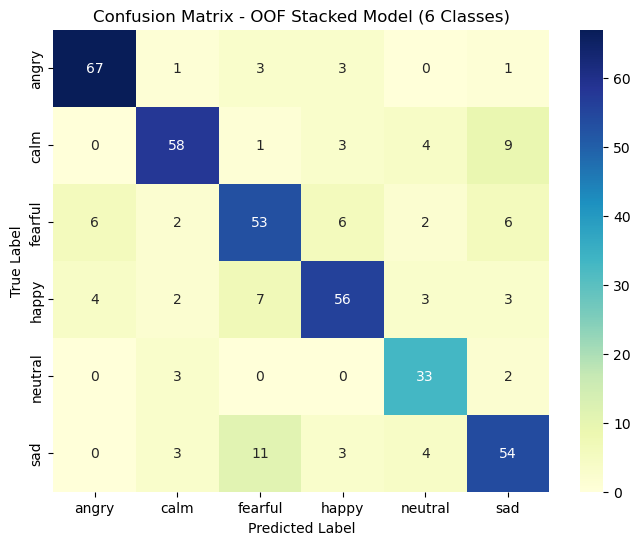


Overall Accuracy: 77.72%
Overall F1 Score: 0.7771
Overall F2 Score: 0.7769


In [78]:
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.1,
    random_state=42
)

meta_model.fit(X_meta_train, y_train_enc)

# Predict
y_train_pred = meta_model.predict(X_meta_train)
y_val_pred = meta_model.predict(X_meta_val)

# Evaluate
evaluate_model(
    y_val_enc, y_val_pred,
    model_name="OOF Stacked Model (6 Classes)",
    y_train_true=y_train_enc,
    y_train_pred=y_train_pred,
    label_names=le_new.classes_
)

## Threshold Tunning

In [79]:
# threshold tunning
# Probabilities from meta-model on validation set
y_val_probs = meta_model.predict_proba(X_meta_val)


In [80]:
n_classes = len(le_new.classes_)
best_thresholds = []

# Tune threshold for each class separately
for i in range(n_classes):
    best_t = 0.5
    best_f2 = 0.0
    for t in np.linspace(0.1, 0.9, 81):  # finer steps = better tuning
        # Binary labels for current class
        y_true_binary = (y_val_enc == i).astype(int)
        y_pred_binary = (y_val_probs[:, i] >= t).astype(int)
        
        # Compute F2 score
        f2 = fbeta_score(y_true_binary, y_pred_binary, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_t = t

    best_thresholds.append(best_t)
    print(f"Class '{le_new.classes_[i]}' - Best Threshold: {best_t:.3f} | F2 Score: {best_f2:.4f}")


Class 'angry' - Best Threshold: 0.150 | F2 Score: 0.8915
Class 'calm' - Best Threshold: 0.120 | F2 Score: 0.8740
Class 'fearful' - Best Threshold: 0.140 | F2 Score: 0.8195
Class 'happy' - Best Threshold: 0.240 | F2 Score: 0.8398
Class 'neutral' - Best Threshold: 0.300 | F2 Score: 0.8462
Class 'sad' - Best Threshold: 0.240 | F2 Score: 0.8015


In [81]:
# Apply best thresholds to predict
y_val_thresh_preds = []

for probs in y_val_probs:
    # Apply threshold to each class and choose the one that passes and is most confident
    passed = [i for i, p in enumerate(probs) if p >= best_thresholds[i]]
    
    if passed:
        # From passed ones, choose class with highest probability
        final_class = passed[np.argmax([probs[i] for i in passed])]
    else:
        # If none passed, fallback to default argmax
        final_class = np.argmax(probs)
    
    y_val_thresh_preds.append(final_class)



Evaluation for OOF Stacked (Threshold Tuned)

Training Metrics:
Training Accuracy: 75.70%
Training F1 Score: 0.7563
Training F2 Score: 0.7566

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.87      0.89      0.88        75
        calm       0.84      0.79      0.81        75
     fearful       0.71      0.72      0.72        75
       happy       0.79      0.75      0.77        75
     neutral       0.77      0.87      0.81        38
         sad       0.72      0.73      0.73        75

    accuracy                           0.78       413
   macro avg       0.78      0.79      0.79       413
weighted avg       0.79      0.78      0.78       413


Per-Class Accuracy (%):
angry: 89.33%
calm: 78.67%
fearful: 72.00%
happy: 74.67%
neutral: 86.84%
sad: 73.33%


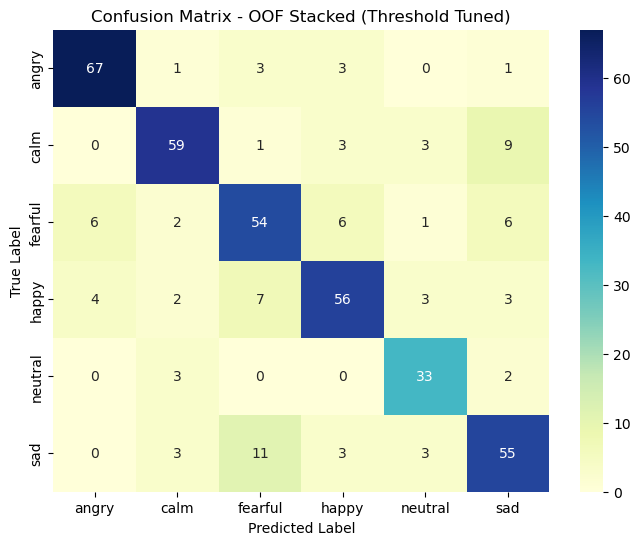


Overall Accuracy: 78.45%
Overall F1 Score: 0.7843
Overall F2 Score: 0.7843


In [82]:
evaluate_model(
    y_val_enc,
    y_val_thresh_preds,
    model_name="OOF Stacked (Threshold Tuned)",
    y_train_true=y_train_enc,
    y_train_pred=y_train_pred,
    label_names=le_new.classes_
)

## Caliberated Meta Model + Threshold Tunning

In [83]:
# caliberation
from sklearn.calibration import CalibratedClassifierCV

# Calibrate using sigmoid (Platt scaling)
calibrated_meta = CalibratedClassifierCV(meta_model, method='sigmoid', cv=5)

calibrated_meta.fit(X_meta_train, y_train_enc)
y_val_probs_calibrated = calibrated_meta.predict_proba(X_meta_val)

In [84]:
n_classes = len(le_new.classes_)
best_thresholds = []

print("\nThreshold Tuning (Calibrated Meta-Model):")

for i in range(n_classes):
    best_t = 0.5
    best_f2 = 0.0
    for t in np.linspace(0.1, 0.9, 81):
        y_true_binary = (y_val_enc == i).astype(int)
        y_pred_binary = (y_val_probs_calibrated[:, i] >= t).astype(int)

        f2 = fbeta_score(y_true_binary, y_pred_binary, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_t = t

    best_thresholds.append(best_t)
    print(f"Class '{le_new.classes_[i]}' → Best Threshold: {best_t:.3f} | F2 Score: {best_f2:.4f}")


Threshold Tuning (Calibrated Meta-Model):
Class 'angry' → Best Threshold: 0.140 | F2 Score: 0.8915
Class 'calm' → Best Threshold: 0.130 | F2 Score: 0.8718
Class 'fearful' → Best Threshold: 0.130 | F2 Score: 0.8216
Class 'happy' → Best Threshold: 0.280 | F2 Score: 0.8420
Class 'neutral' → Best Threshold: 0.240 | F2 Score: 0.8462
Class 'sad' → Best Threshold: 0.260 | F2 Score: 0.8040


In [85]:
# Apply best thresholds to get final predictions
y_val_thresh_preds = []

for probs in y_val_probs_calibrated:
    passed = [i for i, p in enumerate(probs) if p >= best_thresholds[i]]

    if passed:
        final_class = passed[np.argmax([probs[i] for i in passed])]
    else:
        final_class = np.argmax(probs)

    y_val_thresh_preds.append(final_class)


Evaluation for Calibrated Meta + Threshold Tuning

Training Metrics:
Training Accuracy: 76.06%
Training F1 Score: 0.7595
Training F2 Score: 0.7600

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.86      0.88      0.87        75
        calm       0.82      0.79      0.80        75
     fearful       0.74      0.71      0.72        75
       happy       0.77      0.76      0.77        75
     neutral       0.78      0.84      0.81        38
         sad       0.74      0.76      0.75        75

    accuracy                           0.78       413
   macro avg       0.78      0.79      0.79       413
weighted avg       0.78      0.78      0.78       413


Per-Class Accuracy (%):
angry: 88.00%
calm: 78.67%
fearful: 70.67%
happy: 76.00%
neutral: 84.21%
sad: 76.00%


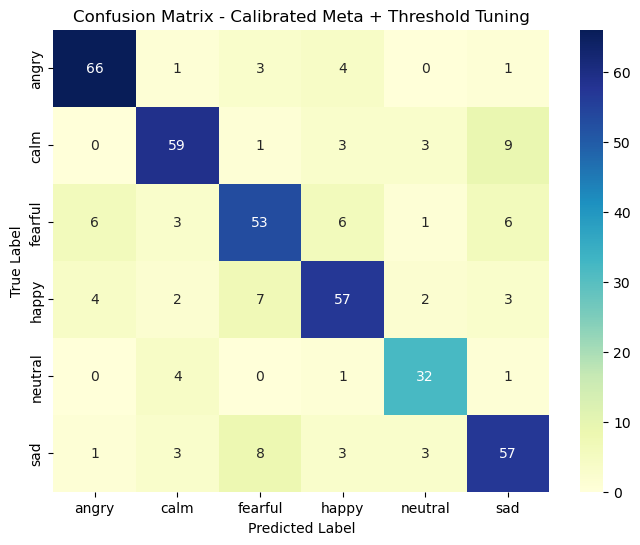


Overall Accuracy: 78.45%
Overall F1 Score: 0.7841
Overall F2 Score: 0.7843


In [86]:
evaluate_model(
    y_true=y_val_enc,
    y_pred=y_val_thresh_preds,
    model_name="Calibrated Meta + Threshold Tuning",
    y_train_true=y_train_enc,
    y_train_pred=calibrated_meta.predict(X_meta_train),
    label_names=le_new.classes_
)

In [87]:
# Apply SMOTE on the OOF stacked meta-features
sm = SMOTE(random_state=42)
X_meta_train_bal, y_meta_bal = sm.fit_resample(X_meta_train, y_train_enc)


In [88]:
# Base meta-model with class weighting
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.1,
    random_state=42
)

# Calibrated meta-model using Platt scaling
calibrated_meta = CalibratedClassifierCV(meta_model, method='sigmoid', cv=5)
calibrated_meta.fit(X_meta_train_bal, y_meta_bal)

# Get calibrated predicted probabilities on validation
y_val_probs_calibrated = calibrated_meta.predict_proba(X_meta_val)


In [89]:
from sklearn.metrics import fbeta_score
import numpy as np

n_classes = len(le_new.classes_)
best_thresholds = []

print("\nThreshold Tuning (Post-SMOTE + Calibrated):")
for i in range(n_classes):
    best_t = 0.5
    best_f2 = 0.0
    for t in np.linspace(0.1, 0.9, 81):
        y_true_binary = (y_val_enc == i).astype(int)
        y_pred_binary = (y_val_probs_calibrated[:, i] >= t).astype(int)

        f2 = fbeta_score(y_true_binary, y_pred_binary, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_t = t

    best_thresholds.append(best_t)
    print(f"Class '{le_new.classes_[i]}' → Best Threshold: {best_t:.3f} | F2 Score: {best_f2:.4f}")



Threshold Tuning (Post-SMOTE + Calibrated):
Class 'angry' → Best Threshold: 0.140 | F2 Score: 0.8915
Class 'calm' → Best Threshold: 0.110 | F2 Score: 0.8718
Class 'fearful' → Best Threshold: 0.120 | F2 Score: 0.8159
Class 'happy' → Best Threshold: 0.270 | F2 Score: 0.8398
Class 'neutral' → Best Threshold: 0.380 | F2 Score: 0.8462
Class 'sad' → Best Threshold: 0.150 | F2 Score: 0.7971


In [90]:
y_val_thresh_preds = []

for probs in y_val_probs_calibrated:
    passed = [i for i, p in enumerate(probs) if p >= best_thresholds[i]]

    if passed:
        final_class = passed[np.argmax([probs[i] for i in passed])]
    else:
        final_class = np.argmax(probs)

    y_val_thresh_preds.append(final_class)



Evaluation for SMOTE + Calibrated Meta + Threshold Tuned

Training Metrics:
Training Accuracy: 75.91%
Training F1 Score: 0.7587
Training F2 Score: 0.7587

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.86      0.88      0.87        75
        calm       0.83      0.79      0.81        75
     fearful       0.74      0.72      0.73        75
       happy       0.78      0.75      0.76        75
     neutral       0.77      0.87      0.81        38
         sad       0.74      0.76      0.75        75

    accuracy                           0.79       413
   macro avg       0.79      0.79      0.79       413
weighted avg       0.79      0.79      0.79       413


Per-Class Accuracy (%):
angry: 88.00%
calm: 78.67%
fearful: 72.00%
happy: 74.67%
neutral: 86.84%
sad: 76.00%


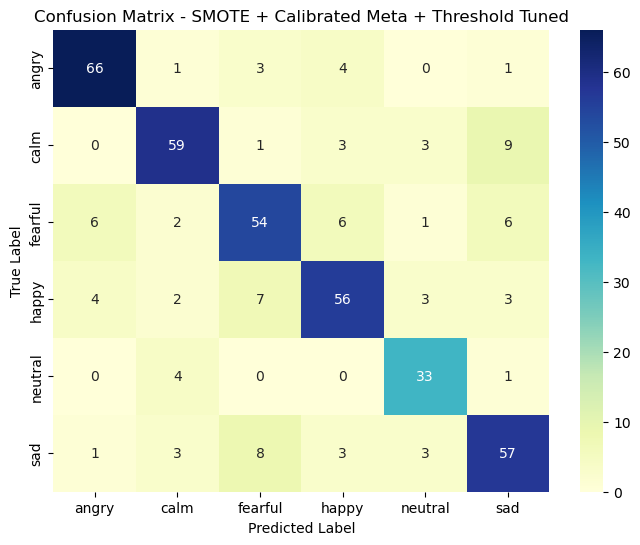


Overall Accuracy: 78.69%
Overall F1 Score: 0.7865
Overall F2 Score: 0.7866


In [91]:
evaluate_model(
    y_true=y_val_enc,
    y_pred=y_val_thresh_preds,
    model_name="SMOTE + Calibrated Meta + Threshold Tuned",
    y_train_true=y_meta_bal,
    y_train_pred=calibrated_meta.predict(X_meta_train_bal),
    label_names=le_new.classes_
)

In [92]:
# Shape: (n_samples, n_classes)
oof_rf, oof_xgb, oof_lgb  # OOF predictions from RF, XGB, LGB

# Validation set probabilities
rf_val_pred = rf_best.predict_proba(X_val_filtered)
xgb_val_pred = xgb_best.predict_proba(X_val_filtered)
lgb_val_pred = lgb_best.predict_proba(X_val_filtered)


In [93]:
# Stack base model probabilities into meta-features
X_meta_train = np.hstack([oof_rf, oof_xgb, oof_lgb])
X_meta_val = np.hstack([rf_val_pred, xgb_val_pred, lgb_val_pred])


In [94]:
# Add confidence-based meta features
conf_max_train = np.max(X_meta_train, axis=1).reshape(-1, 1)
conf_std_train = np.std(X_meta_train, axis=1).reshape(-1, 1)
X_meta_train_ext = np.hstack([X_meta_train, conf_max_train, conf_std_train])

conf_max_val = np.max(X_meta_val, axis=1).reshape(-1, 1)
conf_std_val = np.std(X_meta_val, axis=1).reshape(-1, 1)
X_meta_val_ext = np.hstack([X_meta_val, conf_max_val, conf_std_val])


In [95]:
sm = SMOTE(random_state=42)
X_meta_train_bal, y_meta_bal = sm.fit_resample(X_meta_train_ext, y_train_enc)

In [96]:
from sklearn.calibration import CalibratedClassifierCV

meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.3,
    random_state=42
)

calibrated_meta = CalibratedClassifierCV(meta_model, method='sigmoid', cv=5)
calibrated_meta.fit(X_meta_train_bal, y_meta_bal)

y_val_probs_calibrated = calibrated_meta.predict_proba(X_meta_val_ext)


In [97]:
from sklearn.metrics import fbeta_score
import numpy as np

n_classes = len(le_new.classes_)
best_thresholds = []

print("\nThreshold Tuning (Final Model):")
for i in range(n_classes):
    best_t = 0.5
    best_f2 = 0.0
    for t in np.linspace(0.1, 0.9, 81):
        y_true_binary = (y_val_enc == i).astype(int)
        y_pred_binary = (y_val_probs_calibrated[:, i] >= t).astype(int)

        f2 = fbeta_score(y_true_binary, y_pred_binary, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_t = t

    best_thresholds.append(best_t)
    print(f"Class '{le_new.classes_[i]}' → Best Threshold: {best_t:.3f} | F2 Score: {best_f2:.4f}")



Threshold Tuning (Final Model):
Class 'angry' → Best Threshold: 0.140 | F2 Score: 0.8915
Class 'calm' → Best Threshold: 0.140 | F2 Score: 0.8718
Class 'fearful' → Best Threshold: 0.130 | F2 Score: 0.8121
Class 'happy' → Best Threshold: 0.190 | F2 Score: 0.8417
Class 'neutral' → Best Threshold: 0.470 | F2 Score: 0.8462
Class 'sad' → Best Threshold: 0.210 | F2 Score: 0.7940


In [98]:
y_val_thresh_preds = []

for probs in y_val_probs_calibrated:
    passed = [i for i, p in enumerate(probs) if p >= best_thresholds[i]]

    if passed:
        final_class = passed[np.argmax([probs[i] for i in passed])]
    else:
        final_class = np.argmax(probs)

    y_val_thresh_preds.append(final_class)



Evaluation for Final Model: Stacking + Confidence + SMOTE + Calibration + Threshold Tuning

Training Metrics:
Training Accuracy: 76.52%
Training F1 Score: 0.7648
Training F2 Score: 0.7648

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.87      0.87      0.87        75
        calm       0.83      0.79      0.81        75
     fearful       0.73      0.75      0.74        75
       happy       0.79      0.76      0.78        75
     neutral       0.77      0.87      0.81        38
         sad       0.75      0.75      0.75        75

    accuracy                           0.79       413
   macro avg       0.79      0.80      0.79       413
weighted avg       0.79      0.79      0.79       413


Per-Class Accuracy (%):
angry: 86.67%
calm: 78.67%
fearful: 74.67%
happy: 76.00%
neutral: 86.84%
sad: 74.67%


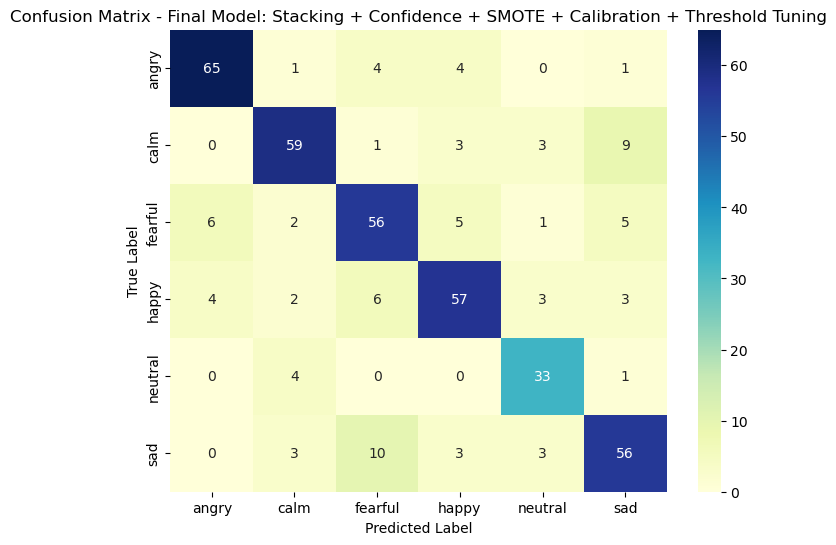


Overall Accuracy: 78.93%
Overall F1 Score: 0.7894
Overall F2 Score: 0.7892


In [99]:
evaluate_model(
    y_true=y_val_enc,
    y_pred=y_val_thresh_preds,
    model_name="Final Model: Stacking + Confidence + SMOTE + Calibration + Threshold Tuning",
    y_train_true=y_meta_bal,
    y_train_pred=calibrated_meta.predict(X_meta_train_bal),
    label_names=le_new.classes_
)

## Soft voting Caliberated Model

In [100]:
# soft voting caliberated
from lightgbm import LGBMClassifier

meta_lgb = LGBMClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=4,
    class_weight='balanced',
    random_state=42
)

meta_lgb.fit(X_meta_train_bal, y_meta_bal)

# Predicted probabilities on validation
proba_lgb = meta_lgb.predict_proba(X_meta_val_ext)


C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [101]:
proba_logreg = calibrated_meta.predict_proba(X_meta_val_ext)

In [102]:
# Try a loop of different weights
best_acc = 0
best_combo = (0.5, 0.5)

for w in np.arange(0.3, 0.8, 0.05):
    combined_probs = w * proba_logreg + (1 - w) * proba_lgb
    preds = np.argmax(combined_probs, axis=1)
    acc = accuracy_score(y_val_enc, preds)
    if acc > best_acc:
        best_acc = acc
        best_combo = (w, 1 - w)

print(f"Best weights: {best_combo} → Accuracy: {best_acc*100:.2f}%")

Best weights: (0.7, 0.30000000000000004) → Accuracy: 79.18%


In [104]:
from sklearn.metrics import fbeta_score
import numpy as np

n_classes = len(le_new.classes_)
best_thresholds = []

print("\nThreshold Tuning (Soft Voting Output):")

for i in range(n_classes):
    best_t = 0.5
    best_f2 = 0.0
    for t in np.linspace(0.1, 0.9, 81):
        y_true_binary = (y_val_enc == i).astype(int)
        y_pred_binary = (combined_probs[:, i] >= t).astype(int)

        f2 = fbeta_score(y_true_binary, y_pred_binary, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_t = t

    best_thresholds.append(best_t)
    print(f"Class '{le_new.classes_[i]}' → Best Threshold: {best_t:.3f} | F2 Score: {best_f2:.4f}")


Threshold Tuning (Soft Voting Output):
Class 'angry' → Best Threshold: 0.320 | F2 Score: 0.8924
Class 'calm' → Best Threshold: 0.110 | F2 Score: 0.8712
Class 'fearful' → Best Threshold: 0.130 | F2 Score: 0.8102
Class 'happy' → Best Threshold: 0.170 | F2 Score: 0.8395
Class 'neutral' → Best Threshold: 0.440 | F2 Score: 0.8462
Class 'sad' → Best Threshold: 0.220 | F2 Score: 0.7862


In [106]:
y_val_soft_preds = []

for probs in combined_probs:
    passed = [i for i, p in enumerate(probs) if p >= best_thresholds[i]]

    if passed:
        final_class = passed[np.argmax([probs[i] for i in passed])]
    else:
        final_class = np.argmax(probs)

    y_val_soft_preds.append(final_class)


Evaluation for Soft Voting (LogReg + LGBM Meta)

Training Metrics:
Training Accuracy: 76.52%
Training F1 Score: 0.7648
Training F2 Score: 0.7648

Validation Metrics:

Classification Report (per class):
              precision    recall  f1-score   support

       angry       0.88      0.85      0.86        75
        calm       0.84      0.79      0.81        75
     fearful       0.71      0.76      0.74        75
       happy       0.81      0.77      0.79        75
     neutral       0.77      0.87      0.81        38
         sad       0.75      0.75      0.75        75

    accuracy                           0.79       413
   macro avg       0.79      0.80      0.79       413
weighted avg       0.79      0.79      0.79       413


Per-Class Accuracy (%):
angry: 85.33%
calm: 78.67%
fearful: 76.00%
happy: 77.33%
neutral: 86.84%
sad: 74.67%


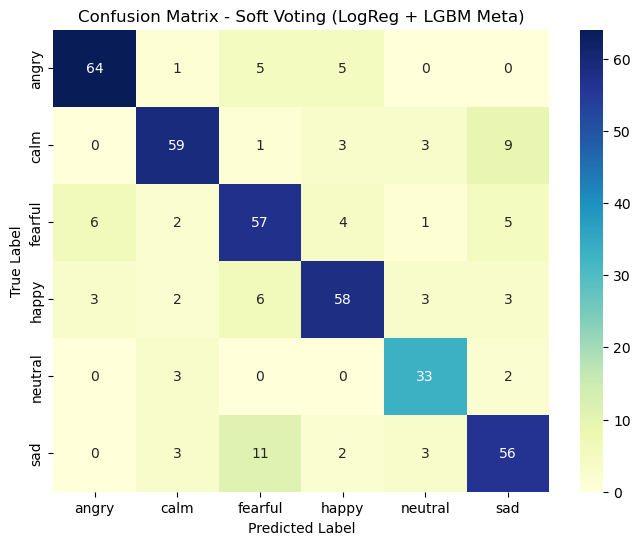


Overall Accuracy: 79.18%
Overall F1 Score: 0.7923
Overall F2 Score: 0.7918


In [107]:
evaluate_model(
    y_true=y_val_enc,
    y_pred=y_val_soft_preds,
    model_name="Soft Voting (LogReg + LGBM Meta)",
    y_train_true=y_meta_bal,
    y_train_pred=calibrated_meta.predict(X_meta_train_bal),
    label_names=le_new.classes_
)

I am taking Soft voting caliberated Model as my final model for Multiclass predictions this Model shows 76.52% Training accuracy and 79.18% validation(overall) accuracy with accuracy of each class >75% with overall F1 score 79.24 and F2 score 79.19

In [108]:
pip install joblib

In [113]:
import joblib
import os

# Create save folder
save_path = "final_model_softvote"
os.makedirs(save_path, exist_ok=True)

# Save all components
joblib.dump(calibrated_meta, f"{save_path}/calibrated_meta.pkl")
joblib.dump(meta_lgb, f"{save_path}/meta_lgb.pkl")
joblib.dump(le_new, f"{save_path}/label_encoder.pkl")
joblib.dump(best_thresholds, f"{save_path}/best_thresholds.pkl")
joblib.dump(best_combo, f"{save_path}/voting_weights.pkl")

print("Final soft-voting model saved successfully.")


Final soft-voting model saved successfully.


In [110]:
calibrated_meta = joblib.load("final_model_softvote/calibrated_meta.pkl")
meta_lgb = joblib.load("final_model_softvote/meta_lgb.pkl")
le_new = joblib.load("final_model_softvote/label_encoder.pkl")
best_thresholds = joblib.load("final_model_softvote/best_thresholds.pkl")
voting_weights = joblib.load("final_model_softvote/voting_weights.pkl")


In [115]:
import joblib
import os

# Path to save base models
base_model_dir = "notebooks and models/"
os.makedirs(base_model_dir, exist_ok=True)

# Save each model
joblib.dump(rf_best, base_model_dir + "rf_best.pkl")
joblib.dump(xgb_best, base_model_dir + "xgb_best.pkl")
joblib.dump(lgb_best, base_model_dir + "lgb_best.pkl")

print("Base models saved successfully!")


Base models saved successfully!


In [120]:
# Assuming you used a DataFrame with column names
feature_importance = lgb_best.feature_importances_
feature_names = df.columns  # replace with your feature DataFrame
top_indices = np.argsort(feature_importance)[::-1][:55]
top_features = feature_names[top_indices]

# Save top features
joblib.dump(top_features, "selected_features_lgb.pkl")


['selected_features_lgb.pkl']